In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PIL import Image
import requests
from io import BytesIO
import xgboost as xgb
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn import metrics
import advertools as adv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import plotly.express as px
import pickle
from xgboost import plot_importance
import plotly.graph_objects as go
import warnings
import optuna
from fitter import Fitter
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ismek-veriseti.csv', encoding = 'ISO-8859-1', delimiter = ';')
df.head(10)

,Donem,Egitim Durumu,Engel Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi
0,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
1,2019-2020,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi
3,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
5,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Ismek Sertifika,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
6,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Ismek Sertifika,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
7,2019-2020,Lise,Engeli Olmayan,Calismiyor,Moda Tasarimi Ve Tekstil Teknolojisi,Giyim Uretiminde Temel Islemler,Hak Etmedi,Bagcilar Kirazli,Bagcilar,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
8,2019-2020,Lisans,Engeli Olmayan,Calismiyor,Gastronomi Ve Mutfak Sanatlari,Hamur Teknikleri,Hak Etmedi,K.Cekmece Halkali Toplu Konutlar,Kucukcekmece,Uretim Yaparak Gelir Elde Etmek,40-50 Yas Arasi
9,2019-2020,Lisans,Engeli Olmayan,Calismiyor,Gastronomi Ve Mutfak Sanatlari,Pastaci Ciragi,Meb Sertifika,K.Cekmece Halkali Toplu Konutlar,Kucukcekmece,Uretim Yaparak Gelir Elde Etmek,40-50 Yas Arasi


In [3]:
df.drop('Donem', axis = 1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216765 entries, 0 to 216764
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Egitim Durumu          216765 non-null  object
 1   Engel Durumu           216765 non-null  object
 2   Calisma Durumu         216765 non-null  object
 3   Alan                   216765 non-null  object
 4   Program                216765 non-null  object
 5   Hak Edilen Belge Tipi  216765 non-null  object
 6   Kurs Merkezi           216765 non-null  object
 7   Kurs Merkezi Ýlcesi    216765 non-null  object
 8   Tercih Sebebi          216765 non-null  object
 9   Yas Araligi            216765 non-null  object
dtypes: object(10)
memory usage: 16.5+ MB


In [5]:
df.describe()

,Egitim Durumu,Engel Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi
count,216765,216765,216765,216765,216765,216765,216765,216765,216765,216765
unique,10,6,5,33,541,3,190,37,5,6
top,Lisans,Engeli Olmayan,Calismiyor,Bilisim Teknolojileri,Excel 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
freq,88133,214098,103132,89580,9570,126184,105187,108485,131358,93354


Toplamda 33 alanda 541 program var. Bu sayıyı sınırlandırabilmek için en fazla sayıda talep gören 5 alan ve bu alanlardaki programlar modele dahil edilsin.

In [9]:
def count_unique_values(data, column_name):
    unique_values = data[column_name].unique()
    count_dict = {}
    
    for value in unique_values:
        count = data[data[column_name] == value].shape[0]
        count_dict[value] = count
    
    return count_dict


In [11]:
count_dict = count_unique_values(df, "Alan")

for value, count in count_dict.items():
    print(f"{value}: {count}")

Dil Egitimleri: 14271
Spor: 23254
Moda Tasarimi Ve Tekstil Teknolojisi: 7198
Gastronomi Ve Mutfak Sanatlari: 5213
Bilisim Teknolojileri: 89580
Grafik Ve Teknik Tasarim: 15405
Kisisel Gelisim Ve Egitim: 13555
Muhasebe Ve Finans: 5012
Orgu Ve Ýsleme Sanatlari: 8618
Muzik: 2826
Tekstil Tasarimi: 3355
Ahsap Tasarimi Ve Teknolojileri: 1363
Muzik Ve Gosteri Sanatlari: 437
El Sanatlari Teknolojisi: 5347
Robotik Ve Ýnovasyon: 187
Cocuk Gelisimi Ve Egitimi: 2006
Yonetim Ve Hizmet: 3950
Guzellik Ve Sac Bakim Hizmetleri: 2891
Sanat Ve Tasarim: 5652
Kuyumculuk Ve Taki Tasarimi: 1387
Sahne Ve Gosteri Sanatlari: 845
Susleme Sanatlari: 2636
Ziraat: 866
Giyim Uretim Teknolojileri: 214
Mesleki Teknik Egitimler: 14
Yabanci Diller: 202
Turizm Ve Otelcilik: 75
Grafik Ve Fotograf: 174
Gida Teknolojisi: 72
Yiyecek Ýcecek Hizmetleri: 65
Kuyumculuk Teknolojisi: 50
Seramik Ve Cam: 15
Tekstil Teknolojisi: 30


Yabanci Diller -> Dil Egitimleri alanına alınsın.


In [44]:
df.loc[df['Alan'] == 'Yabanci Diller', 'Alan'] = 'Dil Egitimleri'

In [45]:
count_dict = count_unique_values(df, "Alan")

for value, count in count_dict.items():
    print(f"{value}: {count}")

Dil Egitimleri: 14473
Spor: 23254
Moda Tasarimi Ve Tekstil Teknolojisi: 7198
Gastronomi Ve Mutfak Sanatlari: 5213
Bilisim Teknolojileri: 89580
Grafik Ve Teknik Tasarim: 15405
Kisisel Gelisim Ve Egitim: 13555
Muhasebe Ve Finans: 5012
Orgu Ve Ýsleme Sanatlari: 8618
Muzik: 2826
Tekstil Tasarimi: 3355
Ahsap Tasarimi Ve Teknolojileri: 1363
Muzik Ve Gosteri Sanatlari: 437
El Sanatlari Teknolojisi: 5347
Robotik Ve Ýnovasyon: 187
Cocuk Gelisimi Ve Egitimi: 2006
Yonetim Ve Hizmet: 3950
Guzellik Ve Sac Bakim Hizmetleri: 2891
Sanat Ve Tasarim: 5652
Kuyumculuk Ve Taki Tasarimi: 1387
Sahne Ve Gosteri Sanatlari: 845
Susleme Sanatlari: 2636
Ziraat: 866
Giyim Uretim Teknolojileri: 214
Mesleki Teknik Egitimler: 14
Turizm Ve Otelcilik: 75
Grafik Ve Fotograf: 174
Gida Teknolojisi: 72
Yiyecek Ýcecek Hizmetleri: 65
Kuyumculuk Teknolojisi: 50
Seramik Ve Cam: 15
Tekstil Teknolojisi: 30


In [46]:
sorted_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)

top_5_dict = dict(sorted_dict[:5])

top_5_dict
    

{'Bilisim Teknolojileri': 89580,
 'Spor': 23254,
 'Grafik Ve Teknik Tasarim': 15405,
 'Dil Egitimleri': 14473,
 'Kisisel Gelisim Ve Egitim': 13555}

In [52]:
df1 = df[df['Alan'].isin(top_5_dict.keys())]
df1

,Egitim Durumu,Engel Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi
0,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
1,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi
3,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
...,...,...,...,...,...,...,...,...,...,...
216760,Lisans,Engeli Olmayan,Calismiyor,Bilisim Teknolojileri,Powerpoint 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi
216761,Lisans,Engeli Olmayan,Ogrenci,Grafik Ve Teknik Tasarim,Illustrator Cizim Uygulamalari 3,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
216762,Lisans,Engeli Olmayan,Ogrenci,Bilisim Teknolojileri,Egitimde Google Classroom Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
216763,Lisans,Engeli Olmayan,Ogrenci,Bilisim Teknolojileri,Excel 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi


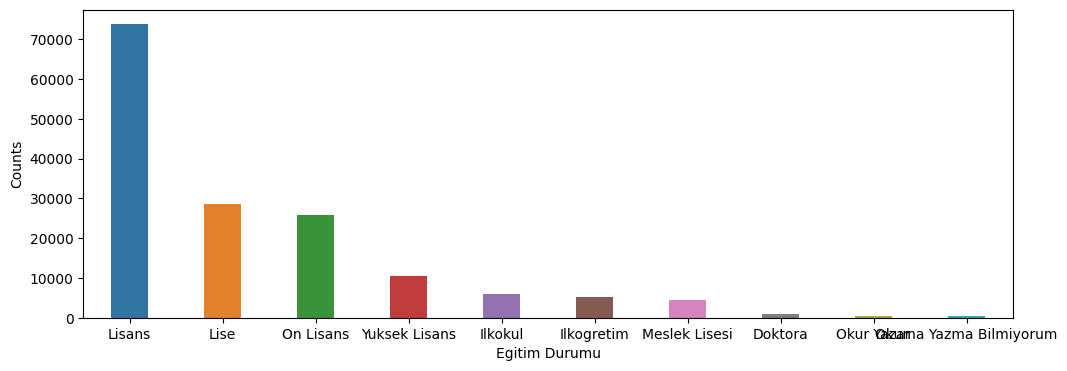

In [72]:
value_counts = df1['Egitim Durumu'].value_counts().reset_index()
value_counts.columns = ['Egitim Durumu', 'Satir Sayisi']

plt.figure(figsize=(12, 4)) 

sns.barplot(x='Egitim Durumu', y='Satir Sayisi', data=value_counts, width=0.4)

plt.xlabel('Egitim Durumu')
plt.ylabel('Counts')

# Grafikleri göster
plt.show()


In [73]:
value_counts

,Egitim Durumu,Satir Sayisi
0,Lisans,73739
1,Lise,28516
2,On Lisans,25889
3,Yuksek Lisans,10560
4,Ilkokul,6029
5,Ilkogretim,5310
6,Meslek Lisesi,4452
7,Doktora,897
8,Okur Yazar,484
9,Okuma Yazma Bilmiyorum,391


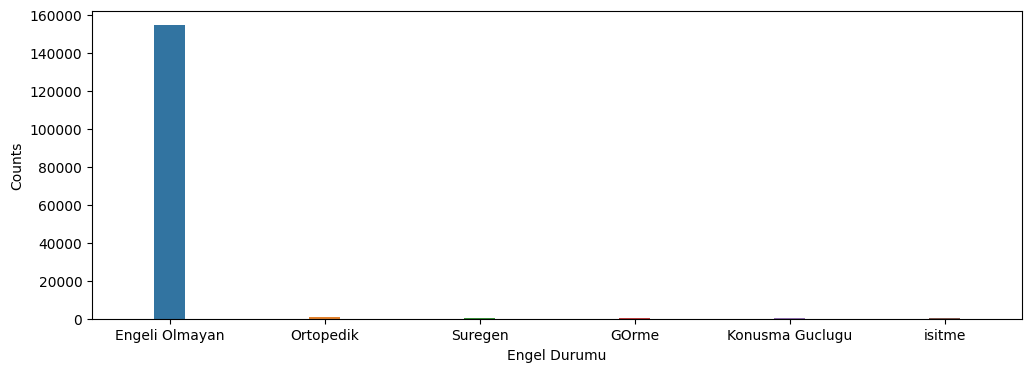

In [69]:
value_counts = df1['Engel Durumu'].value_counts().reset_index()
value_counts.columns = ['Engel Durumu', 'Satir Sayisi']

plt.figure(figsize=(12, 4)) 

sns.barplot(x='Engel Durumu', y='Satir Sayisi', data=value_counts, width=0.2)

plt.xlabel('Engel Durumu')
plt.ylabel('Counts')

# Grafikleri göster
plt.show()

In [64]:
value_counts

,Engel Durumu,Satir Sayisi
0,Engeli Olmayan,154370
1,Ortopedik,662
2,Suregen,593
3,GOrme,257
4,Konusma Guclugu,201
5,isitme,184


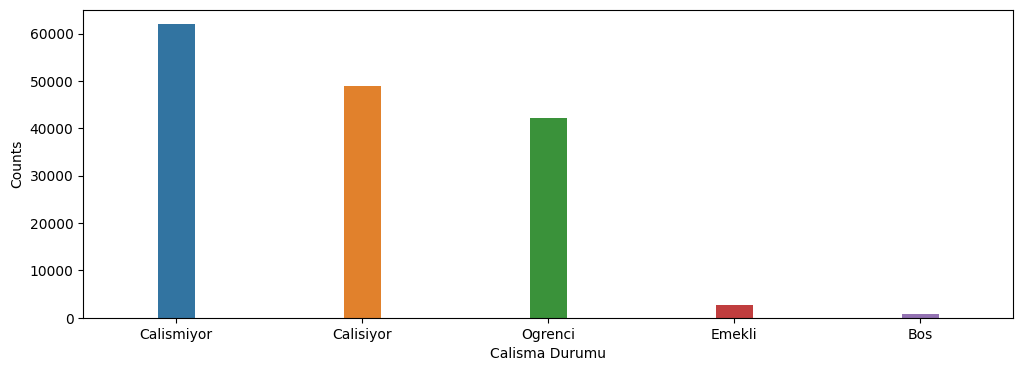

In [74]:
value_counts = df1['Calisma Durumu'].value_counts().reset_index()
value_counts.columns = ['Calisma Durumu', 'Satir Sayisi']

plt.figure(figsize=(12, 4)) 

sns.barplot(x='Calisma Durumu', y='Satir Sayisi', data=value_counts, width=0.2)

plt.xlabel('Calisma Durumu')
plt.ylabel('Counts')

# Grafikleri göster
plt.show()


In [75]:
value_counts

,Calisma Durumu,Satir Sayisi
0,Calismiyor,61942
1,Calisiyor,48882
2,Ogrenci,42103
3,Emekli,2650
4,Bos,690


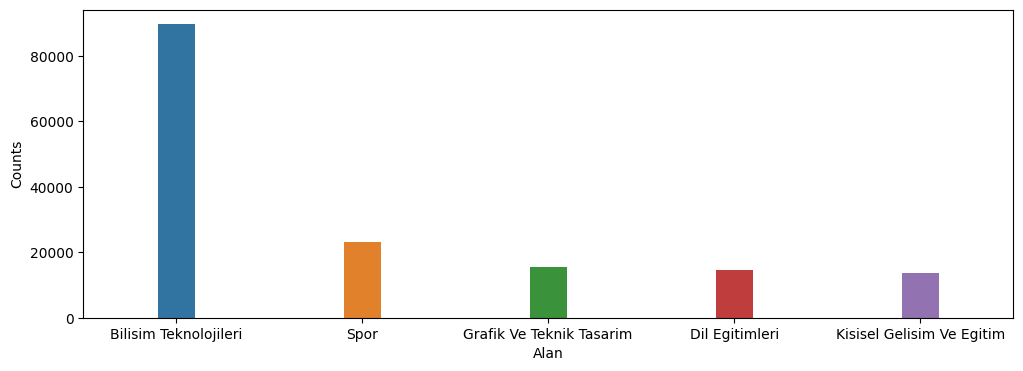

In [76]:
value_counts = df1['Alan'].value_counts().reset_index()
value_counts.columns = ['Alan', 'Satir Sayisi']

plt.figure(figsize=(12, 4)) 

sns.barplot(x='Alan', y='Satir Sayisi', data=value_counts, width=0.2)

plt.xlabel('Alan')
plt.ylabel('Counts')

# Grafikleri göster
plt.show()

In [77]:
value_counts

,Alan,Satir Sayisi
0,Bilisim Teknolojileri,89580
1,Spor,23254
2,Grafik Ve Teknik Tasarim,15405
3,Dil Egitimleri,14473
4,Kisisel Gelisim Ve Egitim,13555


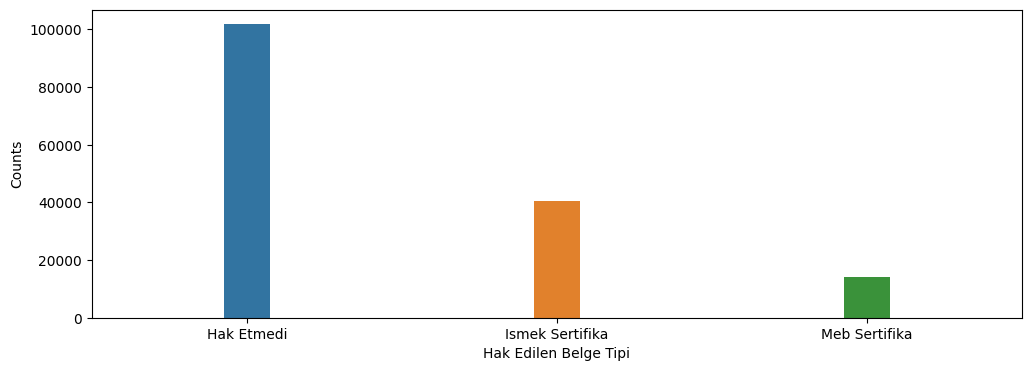

In [80]:
value_counts = df1['Hak Edilen Belge Tipi'].value_counts().reset_index()
value_counts.columns = ['Hak Edilen Belge Tipi', 'Satir Sayisi']

plt.figure(figsize=(12, 4)) 

sns.barplot(x='Hak Edilen Belge Tipi', y='Satir Sayisi', data=value_counts, width=0.15)

plt.xlabel('Hak Edilen Belge Tipi')
plt.ylabel('Counts')

# Grafikleri göster
plt.show()

In [81]:
value_counts

,Hak Edilen Belge Tipi,Satir Sayisi
0,Hak Etmedi,101748
1,Ismek Sertifika,40344
2,Meb Sertifika,14175


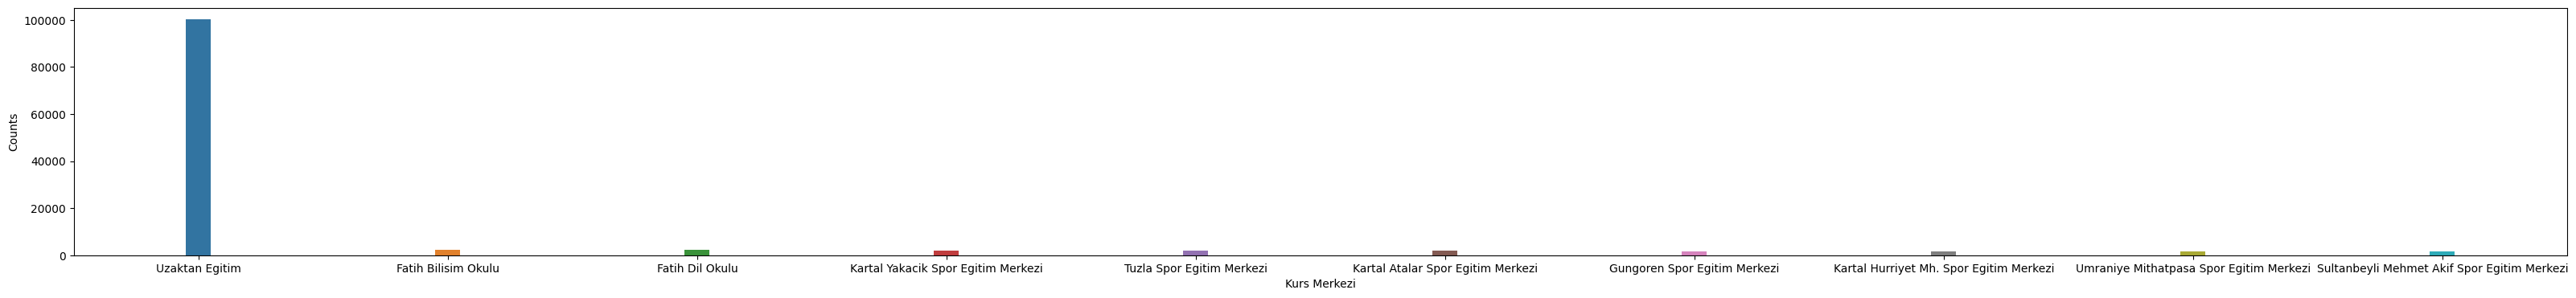

In [109]:
value_counts = df1['Kurs Merkezi'].value_counts().reset_index()
value_counts.columns = ['Kurs Merkezi', 'Satir Sayisi']

# = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)

top_10_value_counts = dict(value_counts[:10])

plt.figure(figsize=(40, 4)) 

sns.barplot(x='Kurs Merkezi', y='Satir Sayisi', data=top_10_value_counts, width=0.1)

plt.xlabel('Kurs Merkezi')
plt.ylabel('Counts')

# Grafikleri göster
plt.show()

In [110]:
value_counts

,Kurs Merkezi,Satir Sayisi
0,Uzaktan Egitim,100150
1,Fatih Bilisim Okulu,2277
2,Fatih Dil Okulu,2267
3,Kartal Yakacik Spor Egitim Merkezi,1814
4,Tuzla Spor Egitim Merkezi,1807
...,...,...
156,Maltepe Cezaevi,24
157,Bagcilar Fatih,18
158,Tuzla Aydintepe,17
159,Ibb Genclik Meclisi,12


In [107]:
value_counts = value_counts[value_counts['Kurs Merkezi'] != 'Uzaktan Egitim']

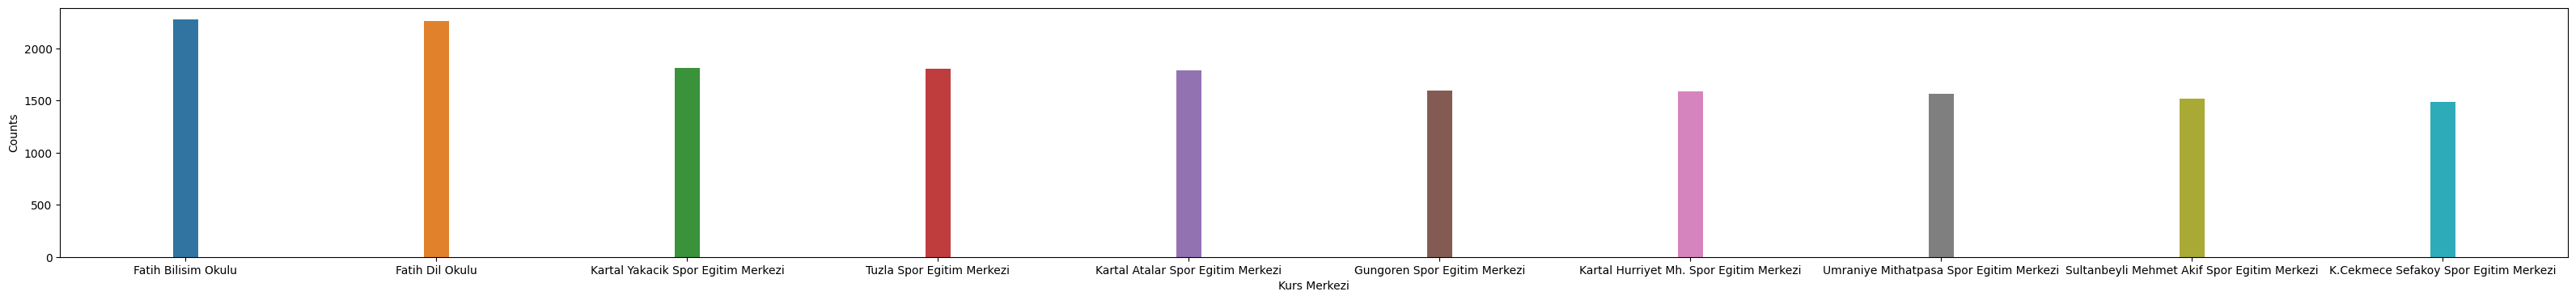

In [108]:
top_10_value_counts = dict(value_counts[:10])

plt.figure(figsize=(40, 4)) 

sns.barplot(x='Kurs Merkezi', y='Satir Sayisi', data=top_10_value_counts, width=0.1)

plt.xlabel('Kurs Merkezi')
plt.ylabel('Counts')

# Grafikleri göster
plt.show()

In [84]:
value_counts

,Kurs Merkezi,Satir Sayisi
0,Uzaktan Egitim,100150
1,Fatih Bilisim Okulu,2277
2,Fatih Dil Okulu,2267
3,Kartal Yakacik Spor Egitim Merkezi,1814
4,Tuzla Spor Egitim Merkezi,1807
...,...,...
156,Maltepe Cezaevi,24
157,Bagcilar Fatih,18
158,Tuzla Aydintepe,17
159,Ibb Genclik Meclisi,12


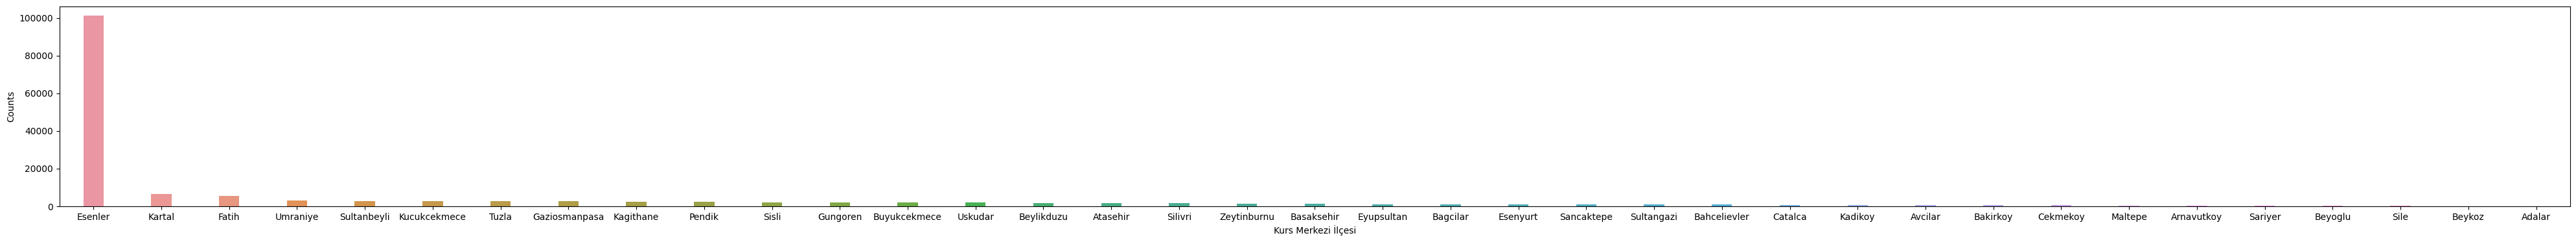

In [127]:
value_counts = df1['Kurs Merkezi Ýlcesi'].value_counts().reset_index()
value_counts.columns = ['Kurs Merkezi Ýlcesi', 'Satir Sayisi']

plt.figure(figsize=(50, 4)) 

sns.barplot(x='Kurs Merkezi Ýlcesi', y='Satir Sayisi', data=value_counts, width=0.3)

plt.xlabel('Kurs Merkezi İlçesi')
plt.ylabel('Counts')

# Grafikleri göster
plt.show()

In [112]:
value_counts

,Kurs Merkezi Ýlcesi,Satir Sayisi
0,Esenler,101081
1,Kartal,6340
2,Fatih,5597
3,Umraniye,2945
4,Sultanbeyli,2732
5,Kucukcekmece,2707
6,Tuzla,2701
7,Gaziosmanpasa,2644
8,Kagithane,2427
9,Pendik,2255


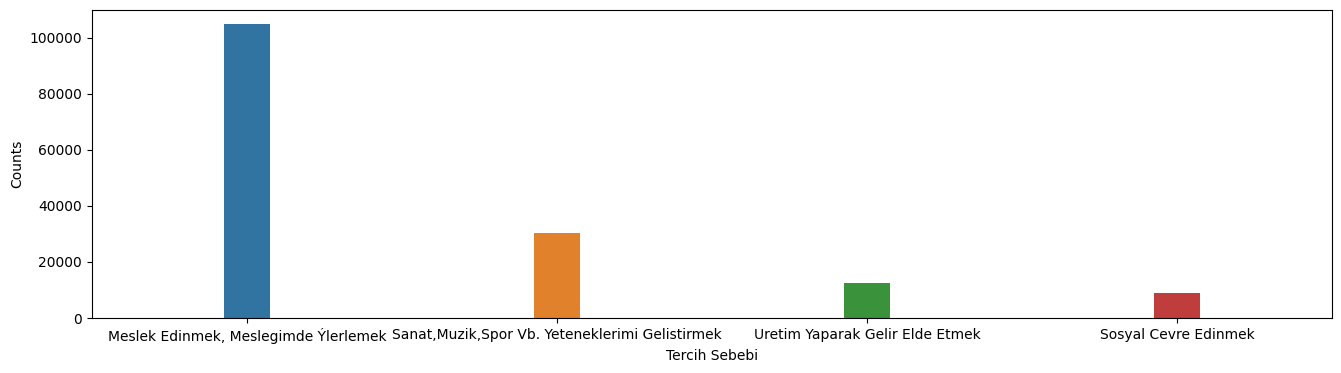

In [124]:
value_counts = df1['Tercih Sebebi'].value_counts().reset_index()
value_counts.columns = ['Tercih Sebebi', 'Satir Sayisi']

plt.figure(figsize=(16, 4)) 

sns.barplot(x='Tercih Sebebi', y='Satir Sayisi', data=value_counts, width=0.15)

plt.xlabel('Tercih Sebebi')
plt.ylabel('Counts')

# Grafikleri göster
plt.show()

In [125]:
value_counts

,Tercih Sebebi,Satir Sayisi
0,"Meslek Edinmek, Meslegimde Ýlerlemek",104752
1,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",30160
2,Uretim Yaparak Gelir Elde Etmek,12403
3,Sosyal Cevre Edinmek,8952


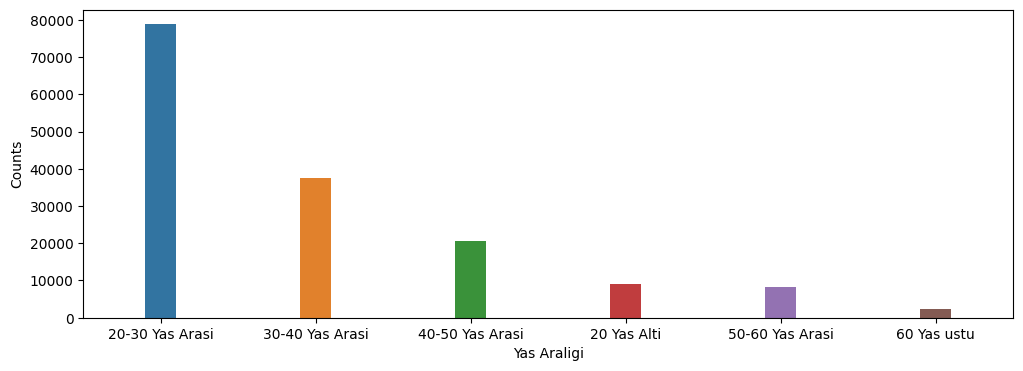

In [123]:
value_counts = df1['Yas Araligi'].value_counts().reset_index()
value_counts.columns = ['Yas Araligi', 'Satir Sayisi']

plt.figure(figsize=(12, 4)) 

sns.barplot(x='Yas Araligi', y='Satir Sayisi', data=value_counts, width=0.2)

plt.xlabel('Yas Araligi')
plt.ylabel('Counts')

# Grafikleri göster
plt.show()

In [126]:
value_counts

,Tercih Sebebi,Satir Sayisi
0,"Meslek Edinmek, Meslegimde Ýlerlemek",104752
1,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",30160
2,Uretim Yaparak Gelir Elde Etmek,12403
3,Sosyal Cevre Edinmek,8952


Kurs Merkezi, Uzaktan Egitim olan satırları inceleyelim.

In [131]:
df2 = df1[df1['Kurs Merkezi'] == 'Uzaktan Egitim']
df2

,Egitim Durumu,Engel Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi
12,Lisans,Engeli Olmayan,Ogrenci,Bilisim Teknolojileri,Powerpoint 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
13,Lisans,Engeli Olmayan,Ogrenci,Bilisim Teknolojileri,Blog Web Sitesi Yapimi Ve Bloggerlik,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
14,On Lisans,Engeli Olmayan,Ogrenci,Bilisim Teknolojileri,Algoritma Ve Programlamaya Temelleri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
18,Lisans,Engeli Olmayan,Ogrenci,Grafik Ve Teknik Tasarim,Illustrator Cizim Uygulamalari 3,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
19,Lisans,Engeli Olmayan,Ogrenci,Grafik Ve Teknik Tasarim,Photoshop 1,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
...,...,...,...,...,...,...,...,...,...,...
216760,Lisans,Engeli Olmayan,Calismiyor,Bilisim Teknolojileri,Powerpoint 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi
216761,Lisans,Engeli Olmayan,Ogrenci,Grafik Ve Teknik Tasarim,Illustrator Cizim Uygulamalari 3,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
216762,Lisans,Engeli Olmayan,Ogrenci,Bilisim Teknolojileri,Egitimde Google Classroom Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
216763,Lisans,Engeli Olmayan,Ogrenci,Bilisim Teknolojileri,Excel 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi


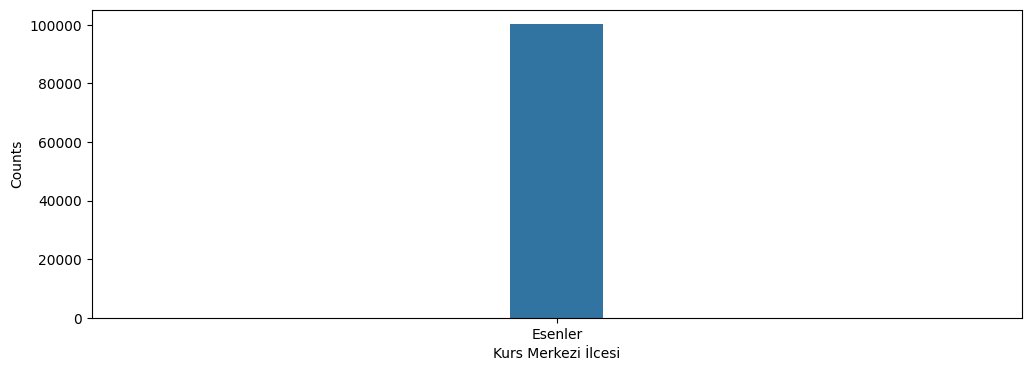

In [133]:
value_counts = df2['Kurs Merkezi Ýlcesi'].value_counts().reset_index()
value_counts.columns = ['Kurs Merkezi Ýlcesi', 'Satir Sayisi']

plt.figure(figsize=(12, 4)) 

sns.barplot(x='Kurs Merkezi Ýlcesi', y='Satir Sayisi', data=value_counts, width=0.1)

plt.xlabel('Kurs Merkezi İlcesi')
plt.ylabel('Counts')

# Grafikleri göster
plt.show()

In [134]:
value_counts

,Kurs Merkezi Ýlcesi,Satir Sayisi
0,Esenler,100150


In [135]:
df3 = df1[df1['Kurs Merkezi'] != 'Uzaktan Egitim']
df3

,Egitim Durumu,Engel Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi
0,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
1,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi
3,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
...,...,...,...,...,...,...,...,...,...,...
202696,Lisans,Engeli Olmayan,Calisiyor,Bilisim Teknolojileri,Dijital Okur Yazarlik,Ismek Sertifika,Fatih Bilisim Okulu,Fatih,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi
203539,Lisans,Engeli Olmayan,Calisiyor,Bilisim Teknolojileri,Sosyal Medya Kullanimi,Ismek Sertifika,Fatih Bilisim Okulu,Fatih,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi
203540,Lisans,Engeli Olmayan,Calisiyor,Bilisim Teknolojileri,Dijital Okur Yazarlik,Ismek Sertifika,Fatih Bilisim Okulu,Fatih,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi
211325,Lisans,Engeli Olmayan,Calisiyor,Bilisim Teknolojileri,Dijital Okur Yazarlik,Ismek Sertifika,Fatih Bilisim Okulu,Fatih,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi


In [138]:
from pathlib import Path  
filepath = Path(r'C:\Users\PC\Downloads\datas\ismek_proje\ismek-veriseti\ismek-veriseti-temizlenmis.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df3.to_csv(filepath, index = False)  